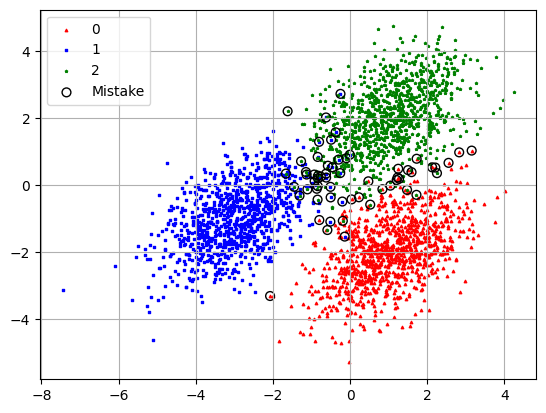

In [26]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = np.array([1, -2])
mean2 = np.array([-3, -1])
mean3 = np.array([1, 2])

r = 0.5
D = 1.0
V = [[D, D * r], [D*r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T
x3 = np.random.multivariate_normal(mean3, V, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

# здесь вычисляйте векторы математических ожиданий и ковариационную матрицу по выборке x1, x2, x3

# параметры для линейного дискриминанта Фишера
Py1, Py2, Py3 = 0.2, 0.4, 0.4
L1, L2, L3 = 1, 1, 1

mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

s1 = np.cov(x1)
s2 = np.cov(x2)
s3 = np.cov(x3)

VV = (s1 + s2 + s3) / 3


alpha1 = np.linalg.inv(VV) @ mm1
alpha2 = np.linalg.inv(VV) @ mm2
alpha3 = np.linalg.inv(VV) @ mm3
beta1 = np.log(L1 * Py1) - 0.5 * mm1 @ np.linalg.inv(VV) @ mm1
beta2 = np.log(L2 * Py2) - 0.5 * mm2 @ np.linalg.inv(VV) @ mm2
beta3 = np.log(L3 * Py3) - 0.5 * mm3 @ np.linalg.inv(VV) @ mm3

predict = []

for x in x_train:
    g1 = x @ alpha1 + beta1
    g2 = x @ alpha2 + beta2
    g3 = x @ alpha3 + beta3
         
    predict.append(np.argmax([g1, g2, g3]))

Q = np.sum(predict != y_train)

import matplotlib.pyplot as plt

plt.scatter(x1.T[:,0], x1.T[:,1], marker="^", s=3, c="red", label="0")

plt.scatter(x2.T[:,0], x2.T[:,1], marker="s", s=3, c="blue", label="1")

plt.scatter(x3.T[:,0], x3.T[:,1], marker="*", s=3, c="green", label="2")

plt.scatter(x_train[predict != y_train][:,0], x_train[predict != y_train][:,1], facecolor="None", edgecolors="black", s=40, label="Mistake")

plt.grid(True)

plt.legend()

plt.show()